## AUTOMATED HEART ATTACK RISK STRATIFICATION


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


###### Features on the df3
Age: The age of the patient.

Sex: The gender of the patient.

Chest pain type: A categorical attribute indicating the type of chest pain experienced by the patient. It has four possible values.

Resting blood pressure: The resting blood pressure of the patient.

Serum cholestoral: The serum cholesterol level in mg/dl of the patient.

Fasting blood sugar: Indicates whether the patient's fasting blood sugar is greater than 120 mg/dl.

Resting electrocardiographic results: A categorical attribute representing the results of the resting electrocardiogram. It has three possible values.

Maximum heart rate achieved: The maximum heart rate achieved by the patient.

Exercise induced angina: Indicates whether the patient experienced angina (chest pain) induced by exercise.

Oldpeak: ST depression induced by exercise relative to rest.

Slope: The slope of the peak exercise ST segment.

Number of major vessels: Represents the number of major blood vessels colored by fluoroscopy (ranging from 0 to 3).

Thal: A categorical attribute indicating the thalassemia type of the patient. It has three possible values: 0 for normal, 1 for fixed defect, and 2 for reversible defect.

Target: The target column serves as the outcome variable and indicates the presence of heart disease in the patient. A value of 0 signifies the absence of heart disease, while a value of 1 indicates the presence of heart disease.


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

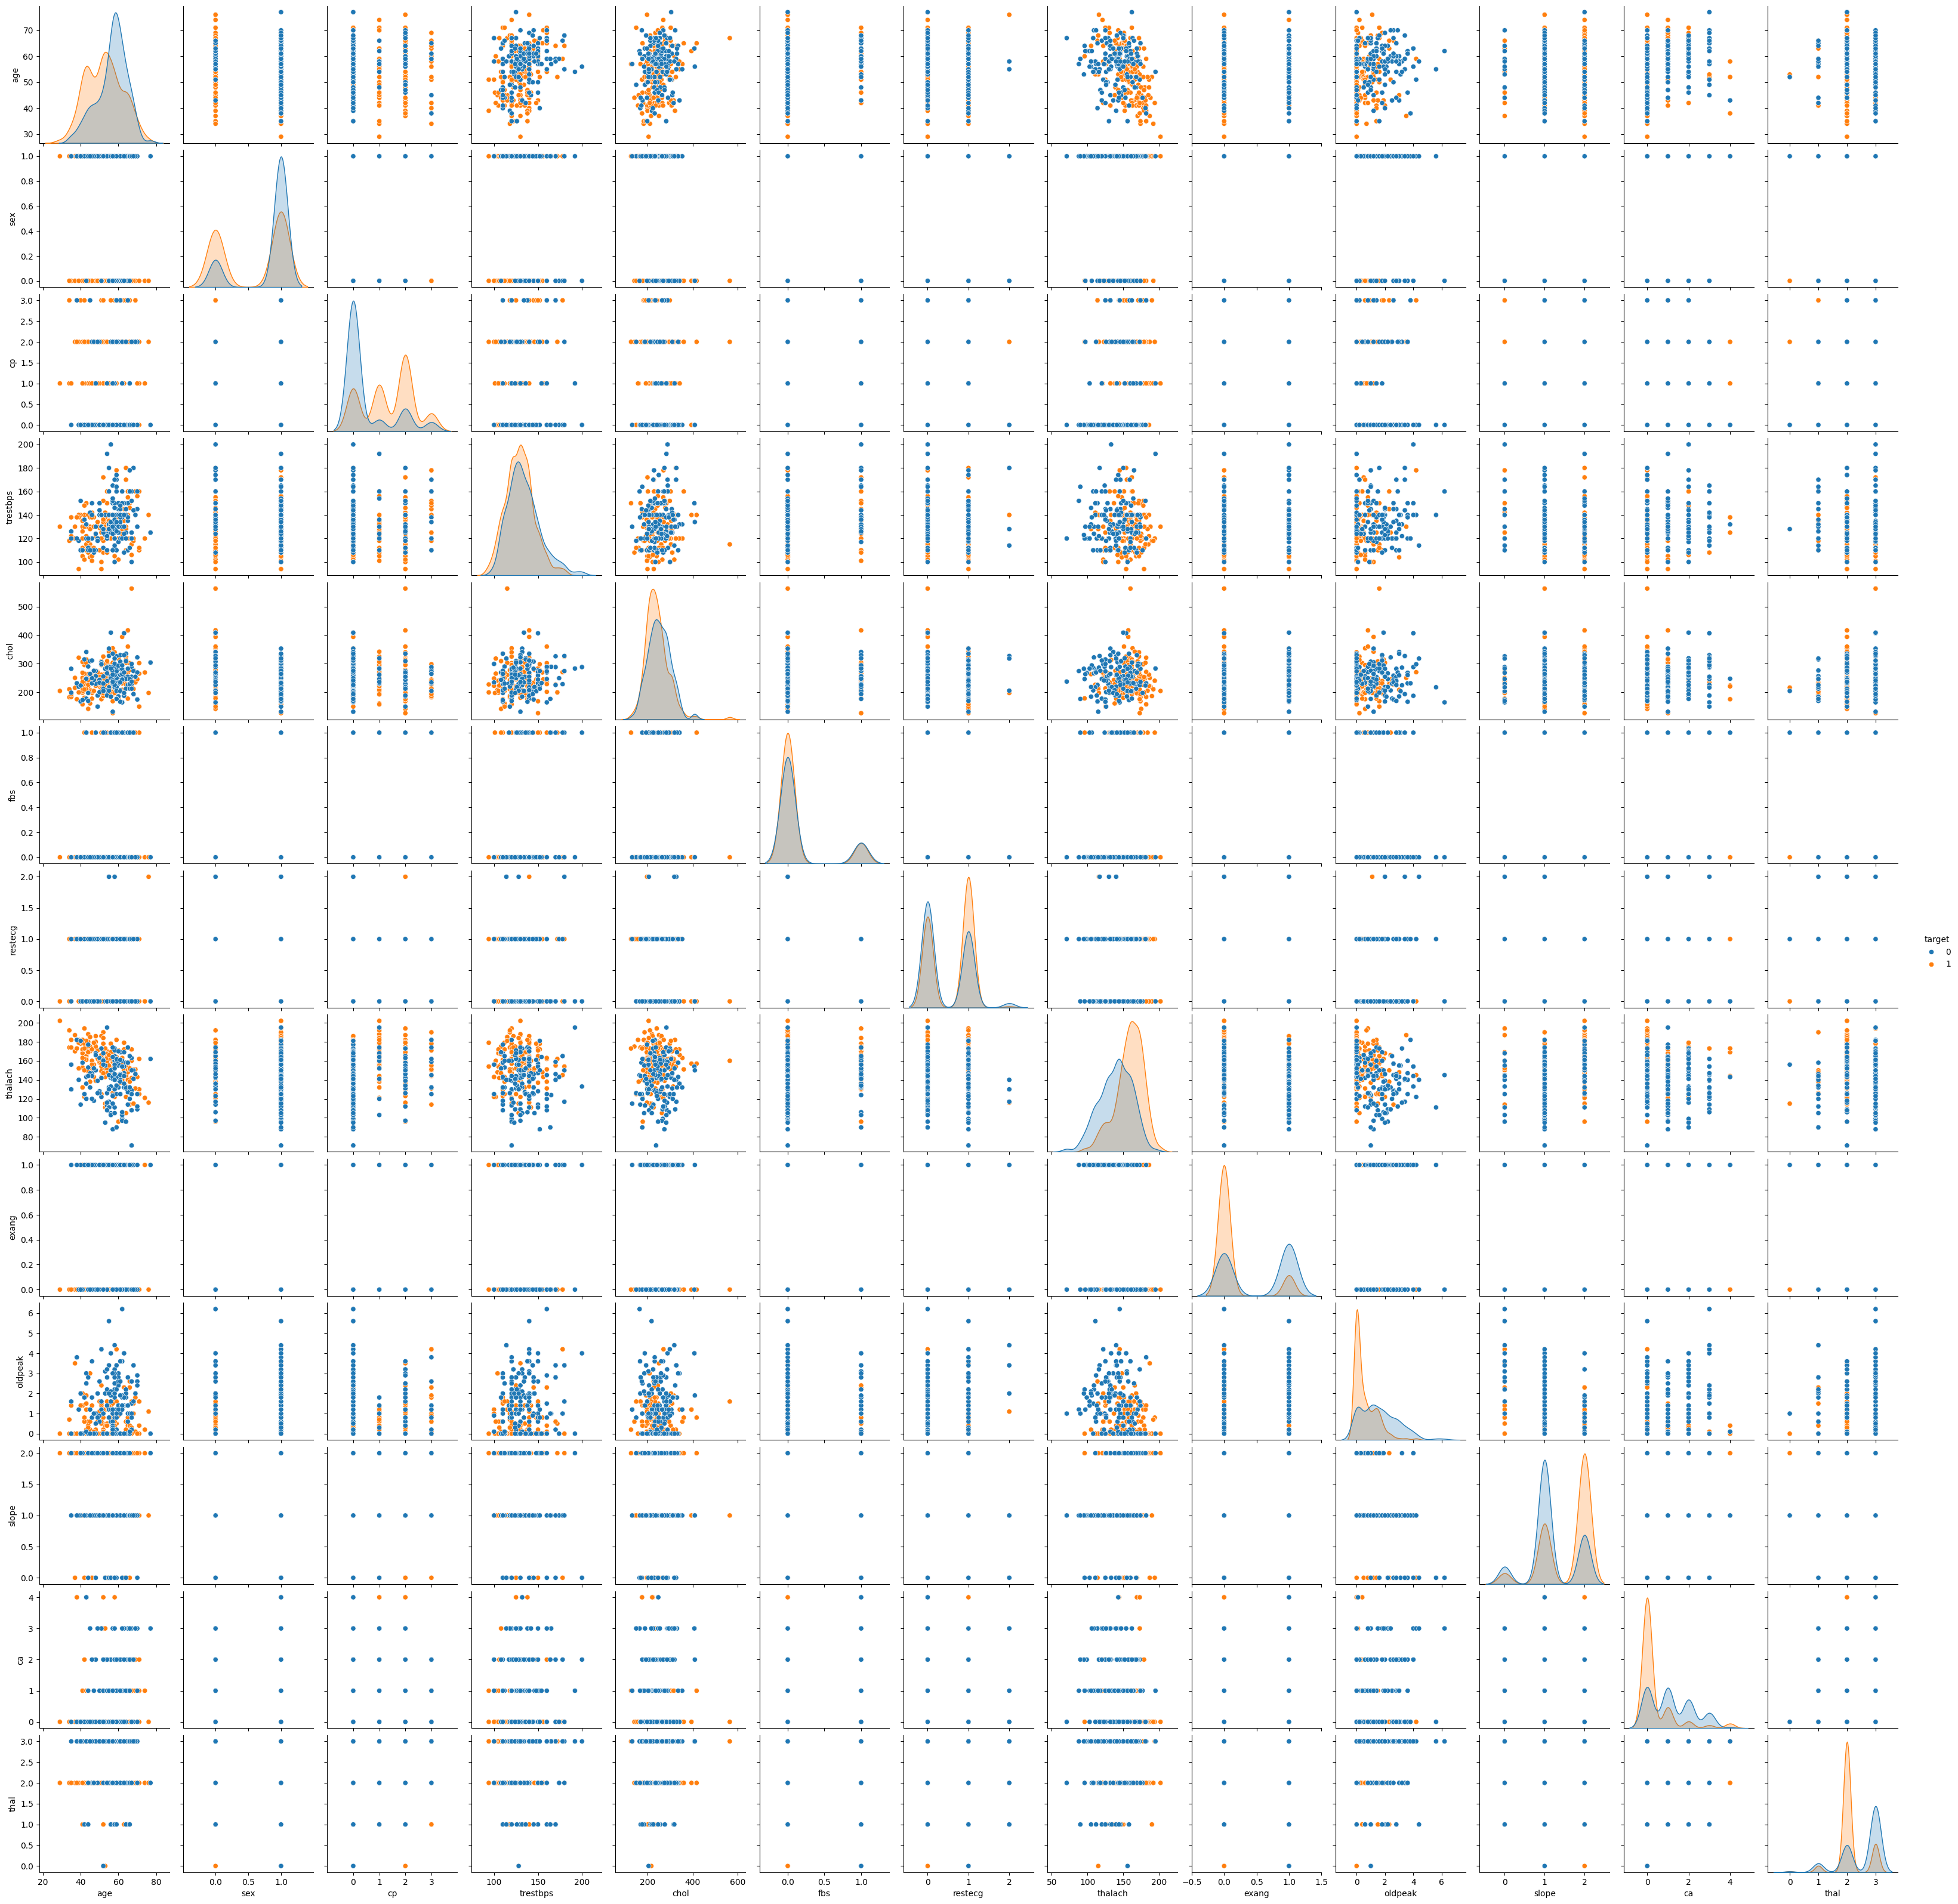

In [7]:
sns.pairplot(df, hue = 'target')

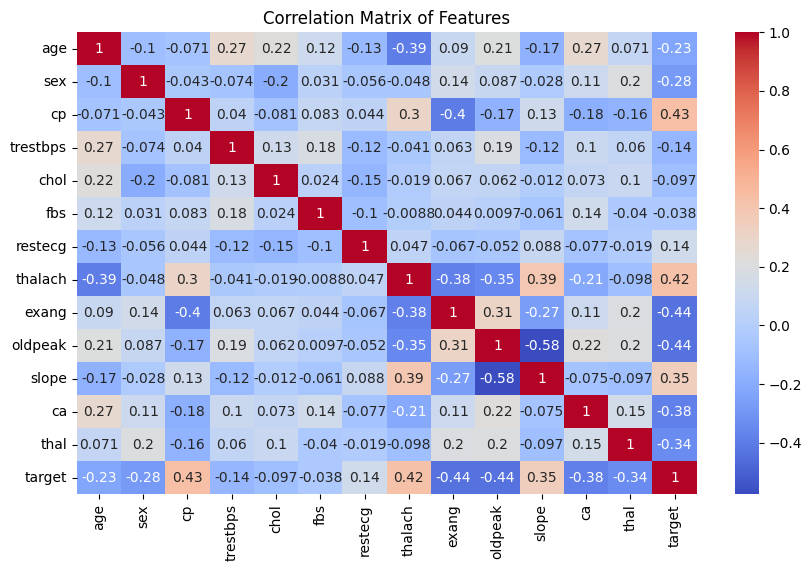

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### FEATURE ENGINEERING

In [43]:
# Separate the features and target variable
X = df.drop('target', axis=1)
#X = df[['cp','thalach','exang','oldpeak','ca']]
y = df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVC
svc = SVC()
model = svc.fit(X, y)
model.score(X_test, y_test)*100

72.55639097744361

In [12]:
rf = RandomForestClassifier()
model1 = rf.fit(X, y)
model1.score(X_test, y_test)*100

100.0

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import SVC

# Define your parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.01, 0.1],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}


In [17]:
# Create the SVC model
svc = SVC()
# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)  # 5-fold cross-validation
# Fit the grid search to your data
grid_search.fit(X_scaled, y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1],
                         'kernel': ['rbf', 'linear']})

In [18]:
# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator: SVC(C=10, gamma=0.1)


In [51]:
best_estimator.score(X_test, y_test)*100

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


52.255639097744364

In [57]:
# Calculating the f1-score for the model
y_pred = best_estimator.predict(X_test)
f1_score(y_test, y_pred)

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6864197530864198

In [50]:

svc = SVC()
model = svc.fit(X_scaled, y)
model.score(X_test, y_test)*100

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


52.255639097744364

In [58]:
# check score using SVC
y_svc = svc.predict(X_test)
f1_score(y_test, y_svc)

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6864197530864198

In [52]:
# Check score using RFC
rf = RandomForestClassifier()
model1 = rf.fit(X_scaled, y)
model1.score(X_test, y_test)*100

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


76.69172932330827

In [27]:
#   Check score using Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model2 = logreg.fit(X, y)

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
model2.score(X_test, y_test)*100

83.45864661654136

In [59]:
# The f1 score for the logistic regression model
y_logreg = logreg.predict(X_test)
f1_score(y_test, y_logreg)

0.8523489932885906

In [25]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [49]:
# logistic rergression with 83%
model2.predict([[58,0,0,100,248,0,0,122,0,1.0,1,0,2]])

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [54]:
# save the model 
import pickle
filename = 'savedmodel.sav'
pickle.dump(model2,open(filename,'wb'))

In [55]:
load_model = pickle.load(open(filename,'rb'))

In [56]:
# Testing the performance of the saved model
load_model.predict([[58,0,0,100,248,0,0,122,0,1.0,1,0,2]])

c:\Users\tynoe\Desktop\Tinomutenda Nyamhingura P\Automated Heart attack Risk Stratification for early intervention\venv5\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)